#  Load Required Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load & Read the Data from .CSV file

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Clean and Transform Data!

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
shape = df.shape
print('Shape of Dataframe',shape)

Shape of Dataframe (7043, 21)


* Check null values in Total Charges and MonthlyCharges

In [6]:
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 
                'StreamingMovies', 'MultipleLines']
for i in replace_cols:
    df[i] = df[i].replace({'No internet service' : 'No'})
    df[i] = df[i].replace({'No phone service' : 'No'})

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')


<b>Data wrangling Analysis: </b>

    1. Fortunately this is not a 'messy' data set
    2. The dataset has no missing values or null values
    3. We have more than 7000 rows and 21 attributes (columns)
    4. Some data that should be categorical are saved as number. Let's fix this
    5. If there are any missing values then 'df.fillna' can be used to fill the missing data
    6. Convert Total Charge to numeric
    7. there are some features that contains ambiguous informations, for example, OnlineSecurity contains 3 
        differents labels, but the correct labels are YES or NO

# Summary of the dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [9]:
df_churn     = df[df['Churn'] == 'Yes']
df_not_Churn = df[df['Churn'] == 'No']


# Data Visualization

<b> Histogram (Total Charges for Churn Customers) </b>

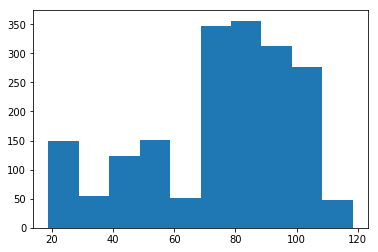

In [10]:
plt.hist(df_churn['MonthlyCharges'],bins= 10)
plt.show()

In [11]:
df_churn['TotalCharges'].max()
df_not_Churn['TotalCharges'].isnull().sum()

df_not_Churn = df_not_Churn.dropna(axis = 0, how ='any') 

<b> Histogram (Total Charges for non Churn Customers) </b>

In [12]:
df_not_Churn['TotalCharges'].isnull().sum()

0

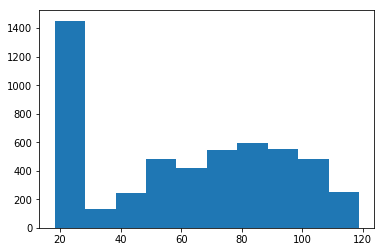

In [13]:
plt.hist(df_not_Churn['MonthlyCharges'],bins= 10)
plt.show()

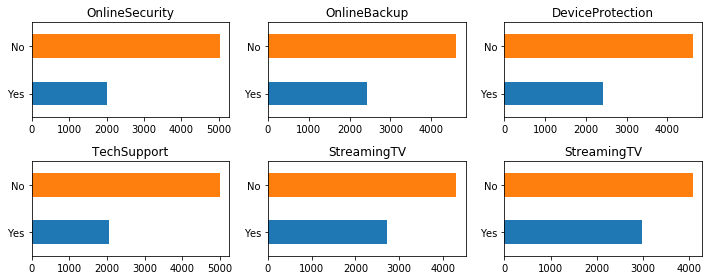

In [14]:
f, axes = plt.subplots(2, 3, sharey=False, sharex=False, figsize=(10,4))
df['OnlineSecurity'].value_counts(ascending=True).plot.barh(title='OnlineSecurity', ax=axes[0,0])
df['OnlineBackup'].value_counts(ascending=True).plot.barh(title='OnlineBackup', ax=axes[0,1])
df['DeviceProtection'].value_counts(ascending=True).plot.barh(title='DeviceProtection', ax=axes[0,2])
df['TechSupport'].value_counts(ascending=True).plot.barh(title='TechSupport', ax=axes[1,0])
df['StreamingMovies'].value_counts(ascending=True).plot.barh(title='StreamingTV', ax=axes[1,1])
df['MultipleLines'].value_counts(ascending=True).plot.barh(title='StreamingTV', ax=axes[1,2])
plt.tight_layout()


<b> Gender and Age (SeniorCitizen) </b>

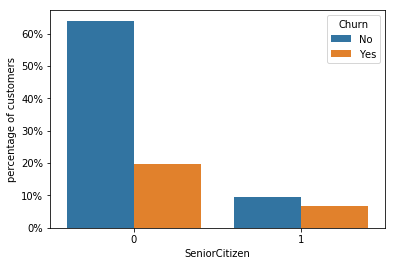

In [15]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

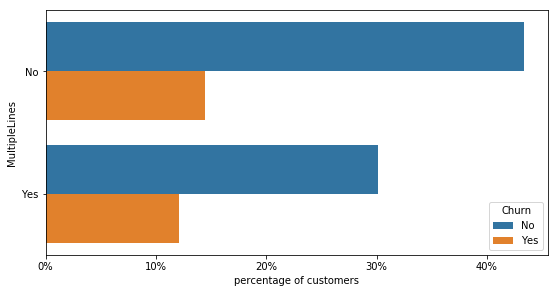

In [16]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

<b> Observations: </b>
    
        * Customers with multiple lines have a slightly higher churn rate


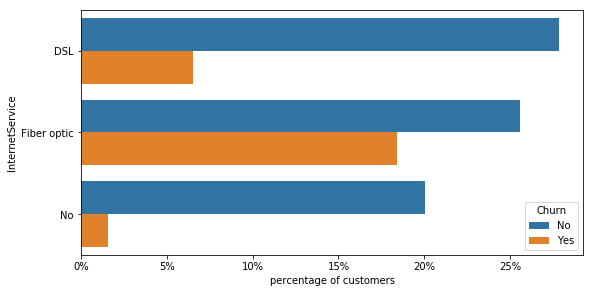

In [17]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

<b> Observation: </b>
    
    * Customers without internet have a very low churn rate
    * Customers with fiber are more probable to churn than those with DSL connection


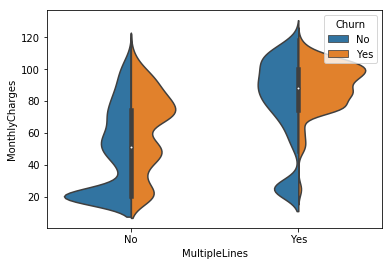

In [18]:
ax = sns.violinplot(x="MultipleLines", y="MonthlyCharges",hue="Churn",split = True, data=df)

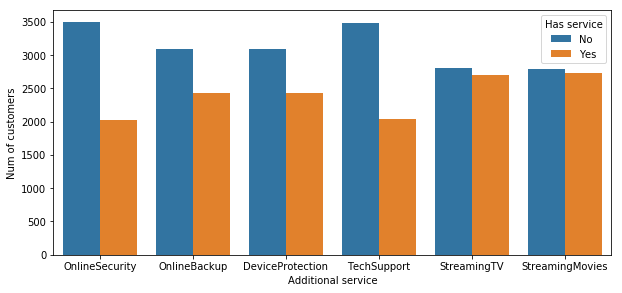

In [19]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

            Above shows the total number of customers for each additional service

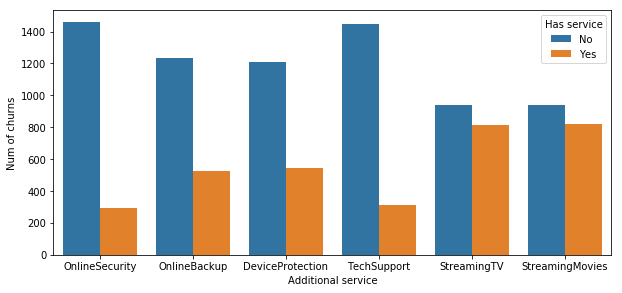

In [20]:
plt.figure(figsize=(10, 4.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

<b> Observations </b>

    * Customers with online Security and tech support has a very low churn rate
    * Customers with Streaming services are more likely to churn

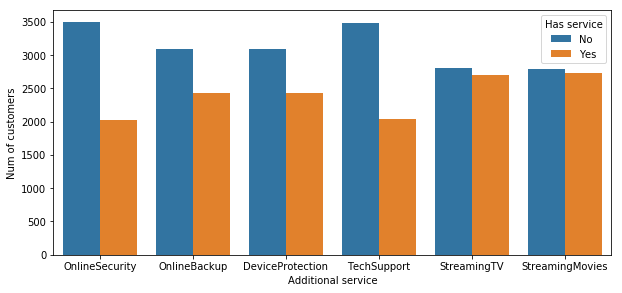

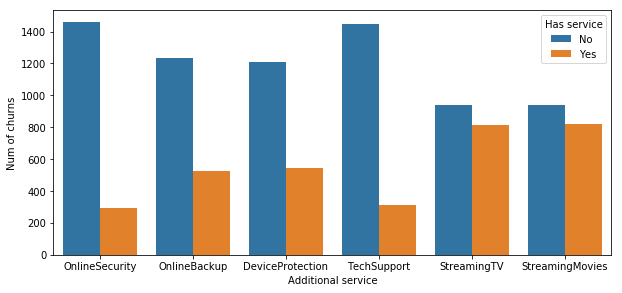

KeyError: "['Month-to-month' 'One year' 'Two year'] not in index"

In [21]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

plt.figure(figsize=(10, 4.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

cols = ["Month-to-month", "One year", "Two year"]
df1 = pd.melt(df[df["MultipleLines"] == "Yes"][cols]).rename({'value': 'Has Multiline'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has Multiline')
ax.set(xlabel='MultipleLines', ylabel='Num of customers')
plt.show()

g = sns.FacetGrid(df, col="PaperlessBilling", size=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "Churn", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])



In [ ]:
barplot_percentages("PaymentMethod")

In [ ]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

<b> Observations: </b>
    
   * As we can see from this graph most of the customers are in the month to month contract. 
   * While there are equal number of customers in the 1 year and 2 year contracts.

In [ ]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

<b> Observations: </b>

   * From the above plot we can observe that the total charges increases as the monthly bill for a customer increases.

In [ ]:
sns.boxplot(x = "Churn", y = "tenure",data = df, hue = "Churn")

<b> Observations: </b>
    * Churn rate is high for the customers who has less tenure/contract with Telco company .